In [1]:
import os
from datetime import datetime
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
# from shapely.geometry import Point
import h5py
import sys
import rasterio
from matplotlib import cm
import matplotlib
import xarray as xr
from constants import *
import rioxarray as rxr
#import earthpy as et
#import earthpy.spatial as es
#import earthpy.plot as ep
%matplotlib inline



In [2]:
homedir = 'c:/users/marianne/documents/pe_snow_fires/'
os.chdir(homedir)
sn_watersheds= gpd.read_file('data/sn_watersheds.shp')

In [11]:
fn = 'c:/users/marianne/downloads/USCASJ_chm_3m_.tif'
chm_may21 = rxr.open_rasterio(fn)


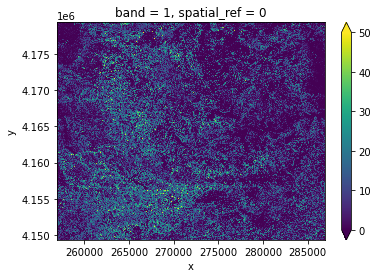

In [40]:
f,ax=plt.subplots()
chm_may21[0][0:10000,0:10000].plot(
    ax=ax,
    vmin=0,
    vmax=50)
plt.show()


In [36]:
chm_may21.indexes

band: Int64Index([1], dtype='int64', name='band')
x: Float64Index([256927.5, 256930.5, 256933.5, 256936.5, 256939.5, 256942.5,
                 256945.5, 256948.5, 256951.5, 256954.5,
                 ...
                 353074.5, 353077.5, 353080.5, 353083.5, 353086.5, 353089.5,
                 353092.5, 353095.5, 353098.5, 353101.5],
                dtype='float64', name='x', length=32059)
y: Float64Index([4179337.5, 4179334.5, 4179331.5, 4179328.5, 4179325.5, 4179322.5,
                 4179319.5, 4179316.5, 4179313.5, 4179310.5,
                 ...
                 4096909.5, 4096906.5, 4096903.5, 4096900.5, 4096897.5, 4096894.5,
                 4096891.5, 4096888.5, 4096885.5, 4096882.5],
                dtype='float64', name='y', length=27486)

<AxesSubplot:title={'center':'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

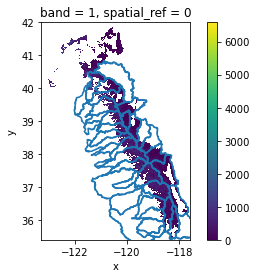

In [125]:
max_path = 'c:/users/marianne/documents/data/'
swe = rxr.open_rasterio(max_path + 'max_swe2001.tif')
f,ax=plt.subplots()
swe.plot(ax=ax)
sn_watersheds.boundary.plot(ax=ax)

<AxesSubplot:title={'center':'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

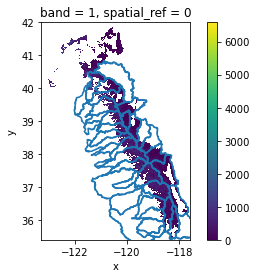

In [7]:
swe = rxr.open_rasterio('max_swe_2001.tif')
f,ax=plt.subplots()
swe.plot(ax=ax)
sn_watersheds.boundary.plot(ax=ax)


In [4]:
### read in SWE data and save as npy file
'''
years = range(1987,2017)
months = ['Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
m_num = range(1,13)
days_in_month = [31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30]
os.chdir('/users/marianne/documents/data/reanalysis')
for yr in years:
    hf = h5py.File('SN_SWE_WY'+ str(yr) + '.h5', 'r')
    swe = hf.get('SWE')
    lat = hf.get('lat')
    lon = hf.get('lon')
    for i in range(len(days_in_month)):
        start = sum(days_in_month[0:i-1])
        end = start + days_in_month[i]
        tmp = swe[start:end,0:2850,:]
        tmp = tmp.astype('float')
        for a in range(days_in_month[i]):
            for b in range(2850):
                for c in range(6601):
                    try:
                        if tmp[a,b,c]<0:
                            tmp[a,b,c] = np.nan
                    except:
                        continue
        da = xr.DataArray(
                data = np.nanmean(tmp,axis=0),
                dims = ["lon","lat"],
                coords = dict(
                    lon=(lon[:2850,0]),
                    lat=(lat[0,:]),
                )
            )
        np.save('swe_'+str(yr)+'_'+months[i]+'_N.npy',da,allow_pickle=True)

    for i in range(len(days_in_month)):
        start = sum(days_in_month[0:i-1])
        end = start + days_in_month[i]
        tmp = swe[start:end,2850:,:]
        tmp = tmp.astype('float32')/1000
        for a in range(days_in_month[i]):
            for b in range(2850,2850*2):
                for c in range(6601):
                    try: 
                        if tmp[a,b,c]<0:
                            tmp[a,b,c] = np.nan
                    except:
                        continue
        da = xr.DataArray(
                data = np.nanmean(tmp,axis=0),
                dims = ["lon","lat"],
                coords = dict(
                    lon=(lon[2850:,0]),
                    lat=(lat[0,:]),
                )
            )
        np.save('swe_'+str(yr)+'_'+months[i]+'_S.npy',da,allow_pickle=True)
'''

C:\Users\Marianne\anaconda3\envs\swe\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
C:\Users\Marianne\anaconda3\envs\swe\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice


MemoryError: Unable to allocate 4.35 GiB for an array with shape (31, 2851, 6601) and data type float64

In [92]:
### getr max swe for each year and save

fp = 'c:/users/marianne/documents/data/reanalysis/h5/'
# daily_swe = {}
daily_swe_total = {}
max_day = []
max_swe = []
for yr in range(1985 , 2016):
# for yr in [2000]:
    hf = h5py.File(fp + 'SN_SWE_WY'+ str(yr) + '.h5', 'r')
    swe = hf.get('SWE')
    dailyswe = []
    numpixels = []
    for i in range(365):
        swe_tmp = np.array(swe[i,:,:])/1000000
        swe_tmp=swe_tmp[swe_tmp>0]
        dailyswe.append(np.nansum(swe_tmp))
        numpixels.append(len(swe_tmp))
    dailyswe=np.array(dailyswe)
    numpixels = np.array(numpixels)
    maxswe = np.nanmax(dailyswe[numpixels>1e6])
    maxday = np.where(dailyswe == maxswe)[0][0]
    daily_swe_total[yr] = dailyswe
    max_day.append(maxday)
    max_swe.append(maxswe)


## save to npy files in home directory
np.save('daily_swe_sum.npy',daily_swe_total)
np.save('max_day.npy',max_day)
np.save('max_swe.npy',max_swe)


In [93]:
### load in daily swe and max swe
fp ='c:/users/marianne/documents/data/reanalysis/h5/'
daily_swe_avg = np.load(fp + 'daily_swe_avg.npy',allow_pickle=True).tolist()
daily_swe_total = np.load('daily_swe_sum.npy',allow_pickle=True).tolist()
max_day = np.load('max_day.npy',allow_pickle=True)
max_swe = np.load('max_swe.npy',allow_pickle=True)

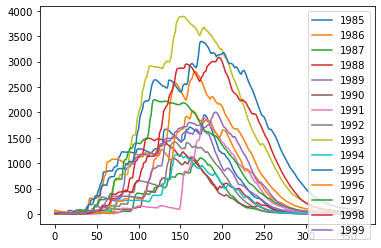

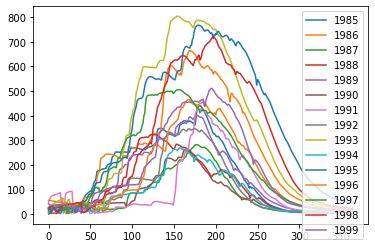

In [94]:
fig,ax=plt.subplots()
for i in range(1985,2000):
    tmp = daily_swe_total[i]
    ax.plot(tmp,label = str(i))
ax.legend()
fig,ax=plt.subplots()
for i in range(1985,2000):
    tmp = daily_swe_avg[i]
    ax.plot(tmp,label = str(i))
ax.legend()

In [95]:
import matplotlib
import matplotlib.cm as cm
blues = cm.get_cmap('Blues', 256)
newcolors = blues(np.linspace(0, 1, 256))
white = np.array([1,1,1,0])
newcolors[:10, :] = white
newcmp = matplotlib.colors.ListedColormap(newcolors)

In [12]:
import h5py
maxswe_map = {}
i=0
max_day = np.load(pe_data_dir + 'max_day.npy')
for yr in range(1985,2016):
    file = pe_data_dir + 'data'+str(yr)+'.npy'
    data =np.load(file,allow_pickle=True).reshape((1))[0]
    hf = h5py.File('c:/users/marianne/documents/data/reanalysis/h5/SN_SWE_WY'+ str(yr) + '.h5', 'r')
    swe = hf.get('SWE')
    '''
    fig,ax=plt.subplots()
    tmp = [data[i] for i in days]
    ax.boxplot(tmp)
    fig.savefig('boxplot'+str(yr)+'.jpg')
    plt.close()
    fig,ax=plt.subplots()
    ax.violinplot(tmp,showextrema=False)
    fig.savefig('violin'+str(yr)+'.jpg')
    plt.close()
    '''
    idx = max_day[i]
    i=i+1
    tmp = swe[idx,:,:]
    maxswe_map[yr] = tmp

In [8]:
import rioxarray as rxr
yr = 2000
dataset = rxr.open_rasterio('c:\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
sn_watersheds= gpd.read_file(pe_data_dir + 'sn_watersheds.shp')
# mtbs= gpd.read_file('mtbs_perimeter_data/mtbs_perims_DD.shp')
sn_geom = sn_watersheds.to_crs(dataset.rio.crs)
max_ndvi=[]
for yr in range(1980,2016):
    dataset = rxr.open_rasterio('c:\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
    avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)
    max_ndvi.append(np.nanmean(avhrr_clip.values))

In [31]:
plt.plot(avhrr_clip[0,:,:])
plt.show()

2486.104892061281

No handles with labels found to put in legend.


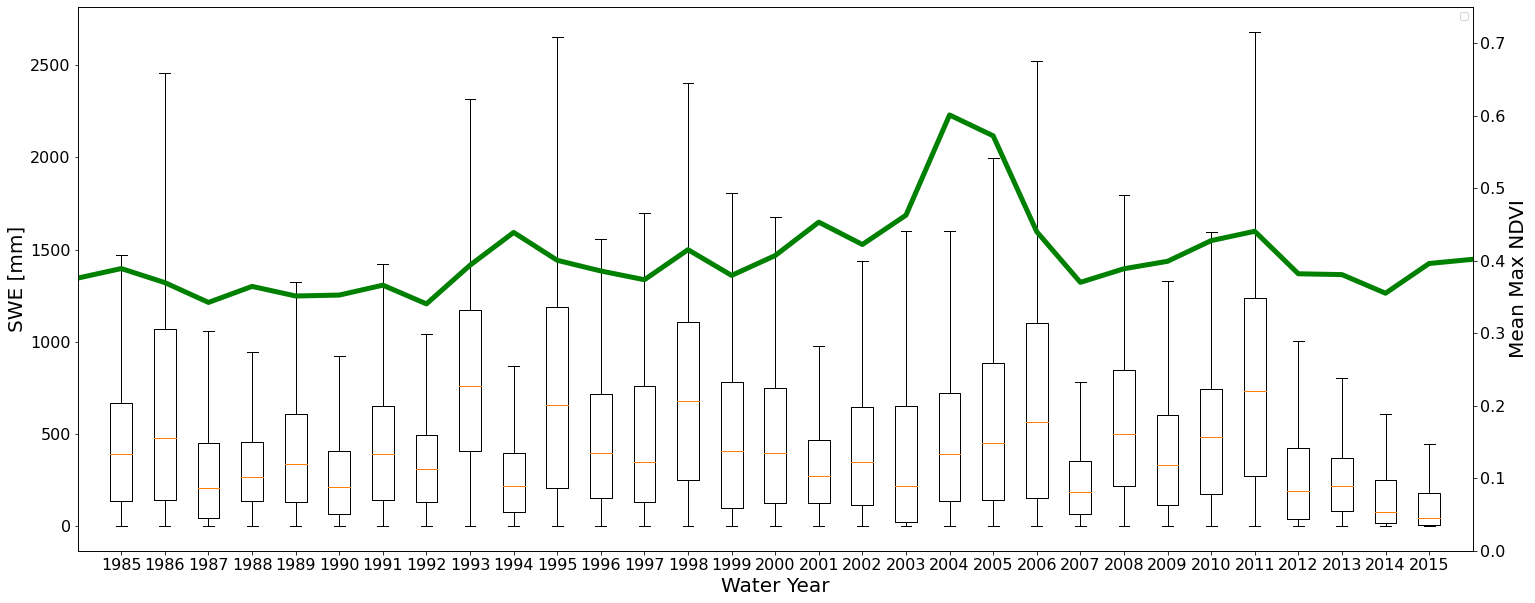

In [45]:
#!pip install cmcrameri
plt.style.use(home_dir+'stylefile.mplstyle')

#import cmcrameri as cm
#import matplotlib.pyplot as plt
#cs = cm.batlow(np.linspace(0,1,7))

fig,ax = plt.subplots(figsize=(25,10))
# tmp = [april1swe[i] for i in range(1985,2016)]
tmp = [maxswe_map[i].flatten() for i in range(1985,2016)]
tmp = [tmp[i][tmp[i]>0] for i in range(len(tmp))]
ax.boxplot(tmp,showfliers=False,positions=range(1985,2016))
ax.set_ylabel('SWE [mm]')
# fig.savefig('april1swe.jpg')
# plt.close()
# ax.plot(years_gpp,mean_april_gpp,'-',linewidth=5,color=cs[0] ,label = 'April GPP')
# ax.plot(years_gpp,mean_july_gpp,'-',linewidth=5,color=cs[3],label = 'July GPP')
# ax.plot(years_gpp,mean_august_gpp,'-',linewidth=5,color=cs[4],label = 'August GPP')

vals = [(i-np.nanmean(max_ndvi))/(np.nanmean(max_ndvi)/.8)+0.4 for i in max_ndvi]
ax2=ax.twinx()
ax2.plot(range(1981,2017),vals,'-',linewidth = 5, color = 'green',label='NDVI')
ax2.set_ylabel('Mean Max NDVI')
ax2.set_ylim([0,0.75])
ax.set_xlim([1984,2016])
ax.set_xlabel('Water Year')
ax.legend()
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [159]:
'''
days = range(90,200,10)
for yr in range(1985,2017):
    hf = h5py.File(filepath + 'SN_SWE_WY'+str(yr)+ '.h5', 'r')
    swe = hf.get('SWE')
    lat = hf.get('lat')
    lon = hf.get('lon')
    data = {}
    for i in days:
        tmp = np.array(swe[i,:,:]).flatten()
        tmp = tmp[np.where((tmp>0) & (tmp<2000))]
        data[i]=tmp
    np.save('data'+str(yr)+'.npy',data,allow_pickle=True)
'''

In [109]:
'''
april1swe = {}

for yr in range(1985,2017):
    file = 'data/data'+str(yr)+'.npy'
    data =np.load(file,allow_pickle=True).reshape((1))[0]
    april1swe[yr] = data[180]

np.save('april1_swe.npy',april1swe)
'''
april1swe = np.load('april1_swe.npy',allow_pickle=True).tolist()



In [30]:
def plot_linear_four(xvar,yvar):
    f,ax=plt.subplots(2,2,figsize=(15,10))
    axs = ax.flatten()
    for k,region in enumerate(['southwest']):
    #        for k,region in enumerate(['northwest','northeast','southwest','southeast']):

     
        with open(pe_data_dir + region + '.pkl', 'rb') as file:
            data = pickle.load(file)

        x_b = normalize(data[xvar+'_means_burned'])
        y_b = normalize(data[yvar+'_means_burned'])
        x_u = normalize(data[xvar+'_means_unburned'])
        y_u = normalize(data[yvar+'_means_unburned'])

        n = 1  # degree of polynomial
        
        p_b, C_p_b = np.polyfit(x_b, y_b, n, cov=True)  # C_p is estimated covariance matrix
        t_b = np.linspace(min(x_b), max(x_b), 500)
        TT_b = np.vstack([t_b**(n-i) for i in range(n+1)]).T
        yi_b = np.dot(TT_b, p_b)  # matrix multiplication calculates the polynomial values
        C_yi_b = np.dot(TT_b, np.dot(C_p_b, TT_b.T)) # C_y = TT*C_z*TT.T
        sig_yi_b = np.sqrt(np.diag(C_yi_b))  # Standard deviations are sqrt of diagonal
        
        p_u, C_p_u = np.polyfit(x_u, y_u, n, cov=True)  # C_p is estimated covariance matrix
        t_u = np.linspace(min(x_u), max(x_u), 500)
        TT_u = np.vstack([t_u**(n-i) for i in range(n+1)]).T
        yi_u = np.dot(TT_u, p_u)  # matrix multiplication calculates the polynomial values
        C_yi_u = np.dot(TT_u, np.dot(C_p_u, TT_u.T)) # C_y = TT*C_z*TT.T
        sig_yi_u = np.sqrt(np.diag(C_yi_u))  # Standard deviations are sqrt of diagonal

        
        axs[k].plot(x_b,y_b,'o',color='darkgoldenrod',label='burned')
        axs[k].fill_between(t_b, yi_b+sig_yi_b, yi_b-sig_yi_b, alpha=.25,color='darkorange')
        axs[k].plot(t_b, yi_b,'-',color='red')
        
        axs[k].plot(x_u,y_u,'o',color='seagreen',label='unburned')
        axs[k].fill_between(t_u, yi_u+sig_yi_u, yi_u-sig_yi_u, alpha=.25,color='seagreen')
        axs[k].plot(t_u, yi_u,'-',color='seagreen')
        # slope_b, intercept_b, r_value_b, p_value_b, std_err_b = stats.linregress(x_b, y_b)
        slope_u, intercept_u, r_value_u, p_value_u, std_err_u = stats.linregress(x_u, y_u)

        if(k>1): axs[k].set_xlabel(xvar)
        if(k%2==0):axs[k].set_ylabel(yvar)
        axs[k].set_title(region)
    #ax.legend()
    plt.show()


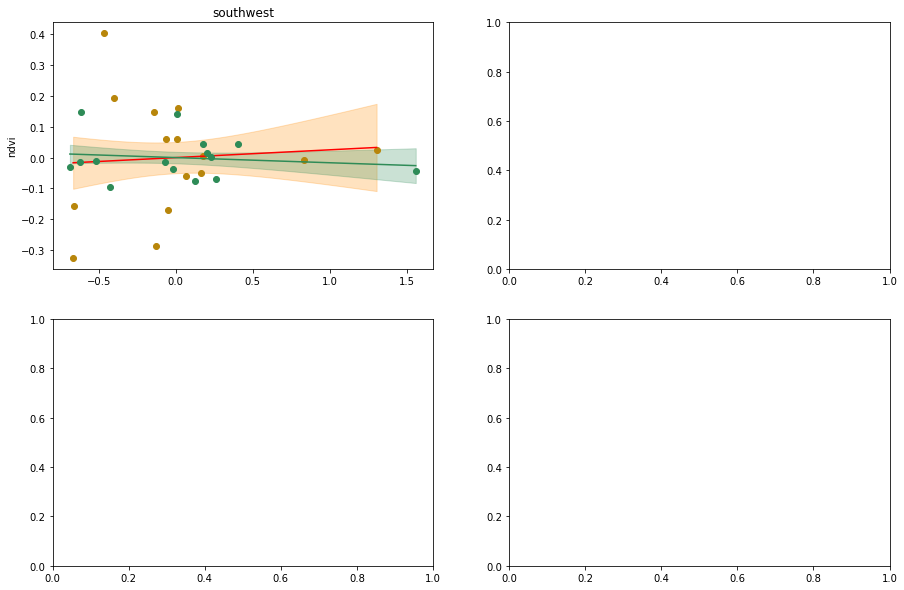

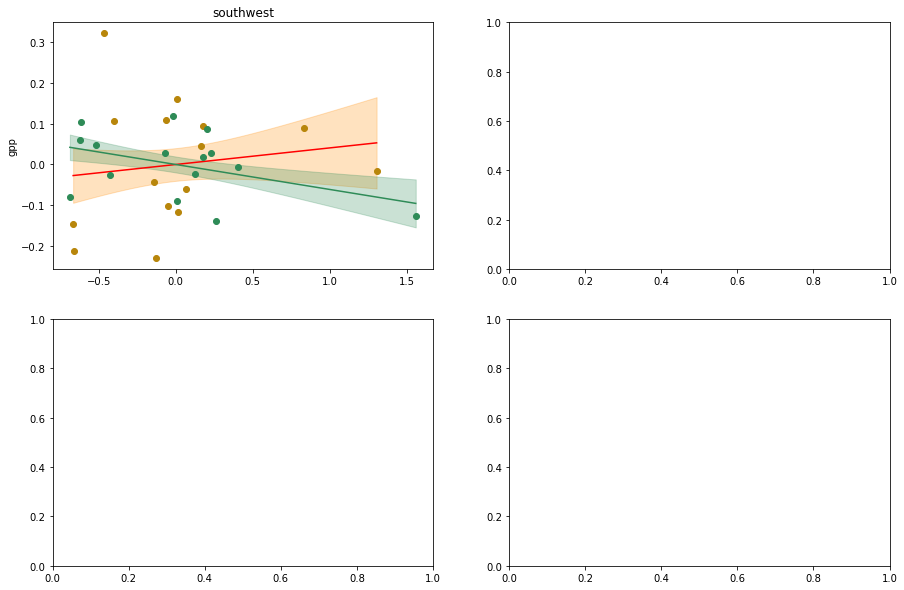

In [31]:
import matplotlib.pyplot as plt
import pickle
from constants import normalize
from scipy import stats
import numpy as np
from constants import pe_data_dir
plot_linear_four(xvar = 'sai',yvar = 'ndvi')

plot_linear_four(xvar = 'sai',yvar = 'gpp')


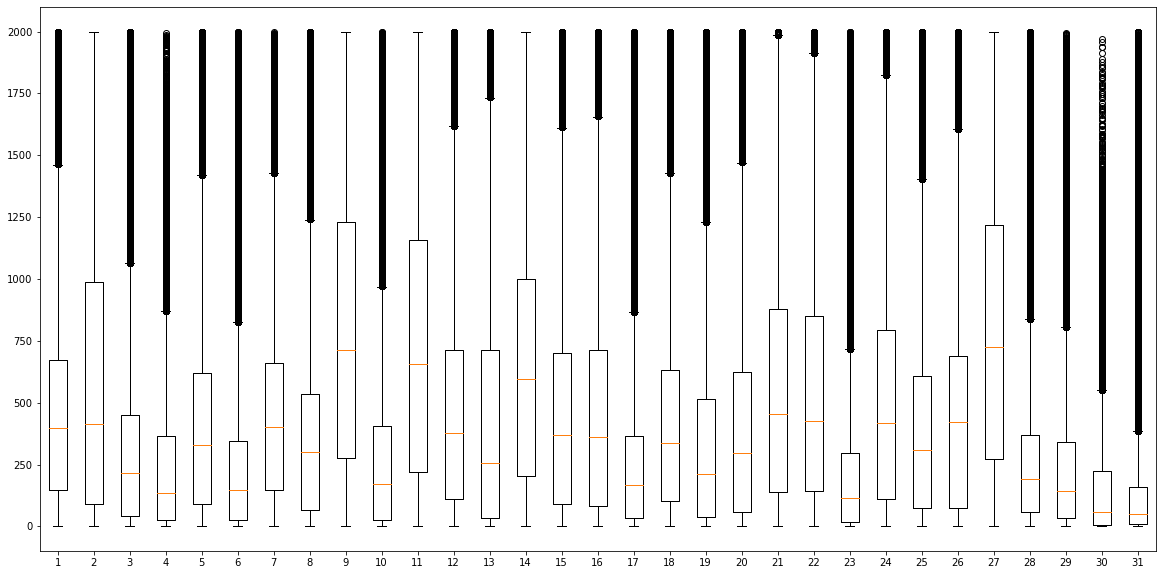

In [111]:
fig,ax = plt.subplots(figsize=(20,10))
tmp = [april1swe[i] for i in range(1985,2016)]
#ax.violinplot(tmp,showextrema=False)
ax.boxplot(tmp)
#fig.savefig('april1swe_box.jpg')
plt.show()
#plt.close()

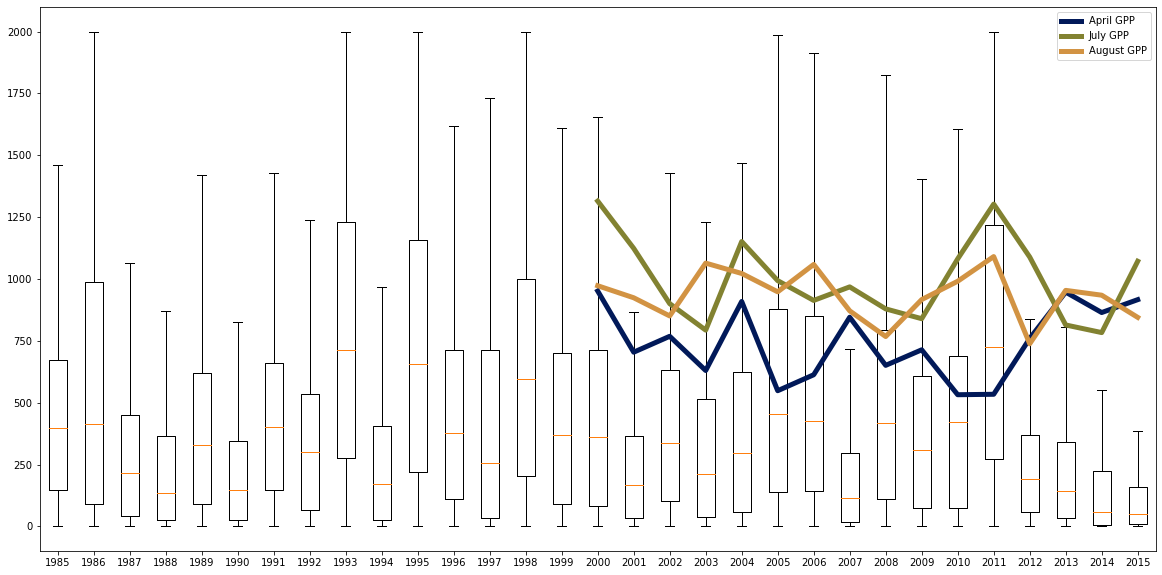

In [119]:

!pip install cmcrameri
from cmcrameri import cm
cs = cm.batlow(np.linspace(0,1,7))
mean_april_gpp=np.load("mean_april_gpp.npy")
mean_july_gpp = np.load("mean_july_gpp.npy")
mean_august_gpp=np.load("mean_august_gpp.npy")
years_gpp=range(2000,2016)


fig,ax = plt.subplots(figsize=(20,10))
tmp = [april1swe[i] for i in range(1985,2016)]
ax.boxplot(tmp,showfliers=False,positions=range(1985,2016))
ax.plot(years_gpp,mean_april_gpp,'-',linewidth=5,color=cs[0] ,label = 'April GPP')
ax.plot(years_gpp,mean_july_gpp,'-',linewidth=5,color=cs[3],label = 'July GPP')
ax.plot(years_gpp,mean_august_gpp,'-',linewidth=5,color=cs[4],label = 'August GPP')
ax.legend()
plt.show()

In [117]:
mtbs= gpd.read_file('c:/users/marianne/documents/data/mtbs_perimeter_data/mtbs_perims_DD.shp')


<AxesSubplot:>

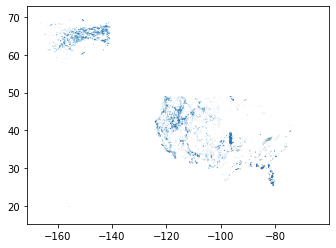

In [118]:
mtbs.plot()

In [113]:
mean_april_gpp= [951.4664443518133,
 704.1253620190319,
 768.3370554177005,
 630.0247933884298,
 909.1195202646816,
 548.3355426677713,
 612.8457402812242,
 845.3971074380165,
 650.9219008264463,
 713.7125154894671,
 532.1344642118329,
 533.9119470855726,
 759.480380008261,
 946.9206939281289,
 864.4333470903838,
 916.4643004539827]
mean_july_gpp = [1315.0396203054065,
 1123.918283120099,
 900.3528683450269,
 793.3012794056954,
 1151.3318200577796,
 993.3351217498969,
 913.4036318613289,
 968.1386710689228,
 879.1820057779612,
 839.4601733388362,
 1081.4255055716055,
 1302.7263722657863,
 1088.8832026413536,
 814.151465125877,
 783.3702022286421,
 1071.7919933966157]
mean_august_gpp = [972.8349153941394,
 924.1403219149814,
 850.6512587701197,
 1064.243912505159,
 1022.331407346265,
 948.098225340487,
 1058.8918695831615,
 871.2711514651259,
 767.4015683037557,
 916.7560874948412,
 990.9186958316137,
 1090.6776723070573,
 737.9711101939744,
 954.0416838629798,
 934.5476681799422,
 844.9083780437475]
years_gpp = range(2000,2016)

np.save("mean_april_gpp",mean_april_gpp)
np.save("mean_july_gpp",mean_july_gpp)
np.save("mean_august_gpp",mean_august_gpp)